In [1]:
install.packages(c("ggplot2", "dplyr"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
file = "/content/mtcars1.csv"
carData = read.csv(file, header = TRUE, row.names = 1, stringsAsFactors = FALSE)
str(carData)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : int  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : int  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : int  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : int  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: int  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: int  4 4 1 1 2 1 4 2 2 4 ...


In [4]:
# converting certain columns to categorical columns
cat_cols = c('cyl', 'vs', 'am', 'gear', 'carb')
carData[cat_cols] = lapply(carData[cat_cols], as.factor)
str(carData)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : Factor w/ 3 levels "4","6","8": 2 2 1 2 3 2 3 1 1 2 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : int  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : Factor w/ 2 levels "0","1": 1 1 2 2 1 2 1 2 2 2 ...
 $ am  : Factor w/ 2 levels "0","1": 2 2 2 1 1 1 1 1 1 1 ...
 $ gear: Factor w/ 3 levels "3","4","5": 2 2 2 1 1 1 1 2 2 2 ...
 $ carb: Factor w/ 6 levels "1","2","3","4",..: 4 4 1 1 2 1 4 2 2 4 ...


Using a function that gives us a ideal population model

In [5]:
# Ideal population model for mpg vs. hp
model_ideal = nls(data = carData, mpg ~ (1 / hp) * a + b * hp, start = list(a = 1, b = 1))
calcmpgIdeal = function(hp){
  return(predict(model_ideal, list(hp = hp)))
}

In [6]:
# Ideal Population data and relationship between mpg and hp
hp_population = seq(min(carData$hp), max(carData$hp), by = 0.1)
mpg_population_ideal = calcmpgIdeal(hp_population)
carDataPopIdeal = data.frame(hp_population, mpg_population_ideal)
colnames(carDataPopIdeal) = c('hpPopulation', 'mpgPopulationIdeal')

# Predictor noise
noise_internal = rnorm(length(hp_population), mean = 0, sd = 0.05)

# Response noise
noise_external = rnorm(length(hp_population), mean = 0, sd = 1)

# Real (noisy) population data and relationship between mpg and hp
mpg_population_noisy = calcmpgIdeal(hp_population + noise_internal)  + noise_external
carDataPopNoisy = data.frame(hp_population, mpg_population_noisy)
colnames(carDataPopNoisy) = c('hpPopulation', 'mpgPopulationNoisy')

In [7]:
head(carDataPopNoisy,5)

,hpPopulation,mpgPopulationNoisy
,<dbl>,<dbl>
1,52.0,36.70596
2,52.1,36.67716
3,52.2,36.44833
4,52.3,37.63314
5,52.4,35.08461


Fitting a simple linear regression model for the population data

In [8]:
# lm stands for linear-model
# response/output variable is column 'mpg_population_noisy'
# predictor/input variable is column 'hp_population'
model = lm(data = carDataPopNoisy, mpg_population_noisy ~ hp_population)

  (Intercept) hp_population 
  26.17831902   -0.04190769 


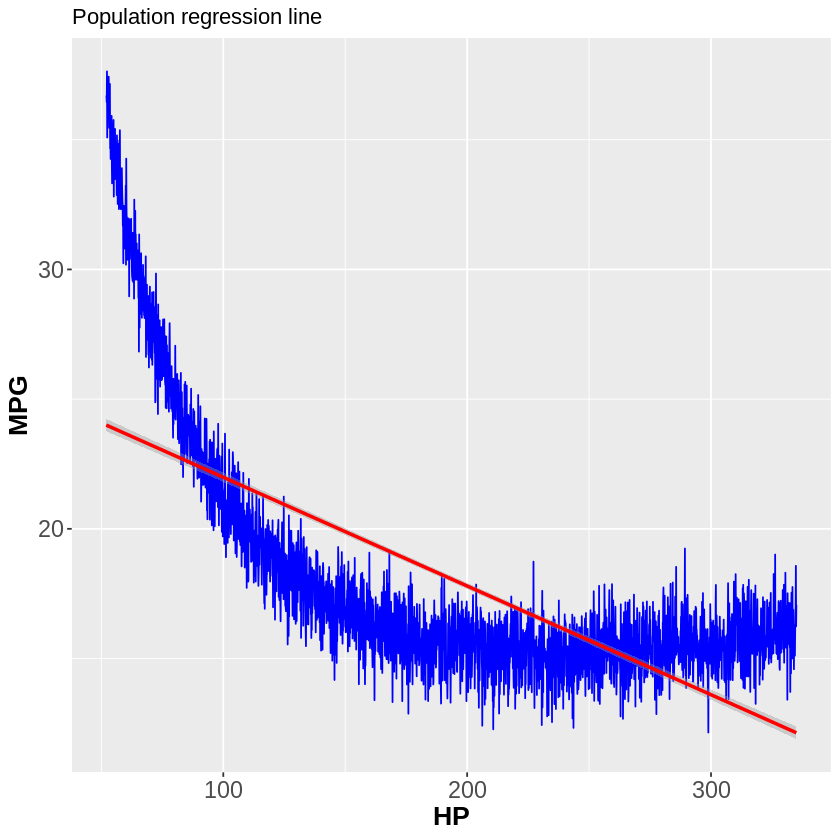

In [23]:
# Fit and draw population regression line using noisy measurements
model = lm(data = carDataPopNoisy, mpg_population_noisy ~ hp_population)
coef_population = coef(model)
print(coef_population)
ggplot(data = carDataPopNoisy, aes(x = hpPopulation, y = mpgPopulationNoisy)) +
   geom_line(color = 'blue') +
   geom_smooth(method = lm, formula = y ~ x, color = 'red') +
   labs(x = 'HP', y = 'MPG') +
   ggtitle("Population regression line") +
   theme(axis.text = element_text(size = 12),
   axis.text.x = element_text(size = 14),
   axis.text.y = element_text(size = 14),
   axis.title = element_text(size = 16, face = "bold"))

In [24]:
# Print summary of model
summary(model)


Call:
lm(formula = mpg_population_noisy ~ hp_population, data = carDataPopNoisy)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9955 -2.3504 -0.7212  1.8059 13.6466 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   26.1783190  0.1562505  167.54   <2e-16 ***
hp_population -0.0419077  0.0007439  -56.34   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.235 on 2829 degrees of freedom
Multiple R-squared:  0.5287,	Adjusted R-squared:  0.5286 
F-statistic:  3174 on 1 and 2829 DF,  p-value: < 2.2e-16


Above we can see various values.

Among them, we can see the "Coefficients" which  consist of -

- (Intercept) which corresponds to the intercept of the line where it cuts the Y-axis i.e., 26.170489 approximately.
- hp_population with value -0.041965, meaning the slope of the straight line or how inclined is the straight line.
`(Our straight line is negatively sloped in such a away that as our hp increases the mpg decreases and vice versa.)`


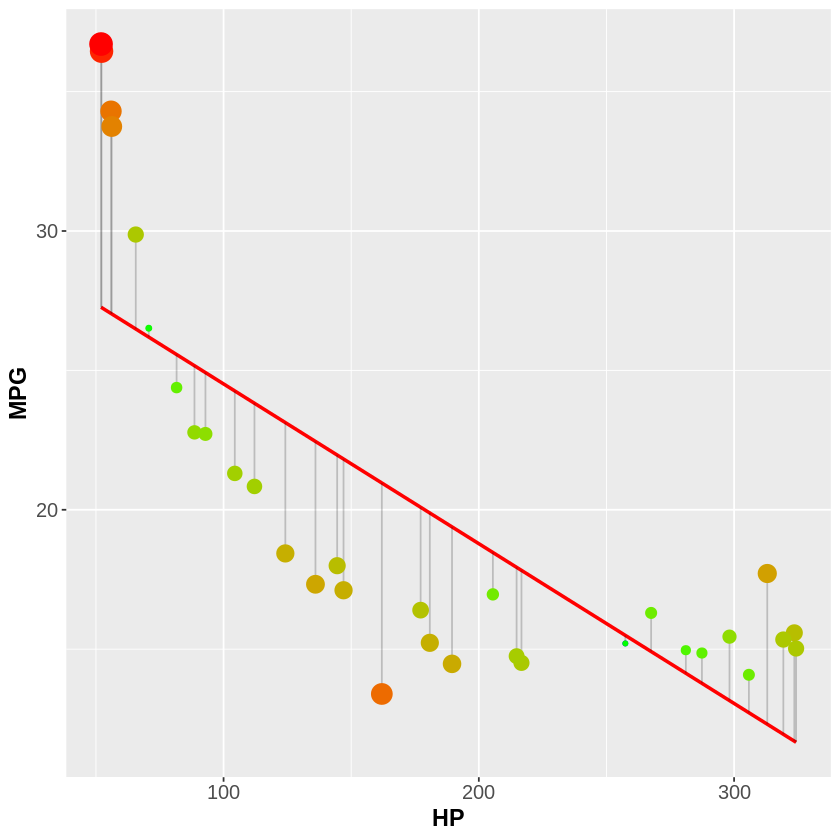

In [26]:
# Plotting actual and predicted response values clearly
# showing the residuals
#carDataSample$mpg_predicted = predict(model)
#carDataSample$residuals = residuals(model)

ggplot(data = carDataSample, aes(x = hp, y = mpg)) +
   geom_point(size = 1, color = 'blue') +
   geom_smooth(method = lm, formula = y ~ x, se = FALSE, color = 'red') +
   geom_segment(aes(xend = hp, yend = mpg_predicted), alpha = 0.2) +
   geom_point(aes(color = abs(residuals), size = abs(residuals))) +
   scale_color_continuous(low = "green", high = "red") +
   guides(color = FALSE, size = FALSE) +
   labs(x = 'HP', y = 'MPG') +
   #ggtitle("Sample regression line") +
   theme(axis.text = element_text(size = 12),
   axis.text.x = element_text(size = 12),
   axis.text.y = element_text(size = 12),
   axis.title = element_text(size = 14, face = "bold"))

# Drawing a random sample from our population

In [11]:
nsamples = 32
carDataSample = carDataPopNoisy[sample(nrow(carDataPopNoisy), nsamples), ]
colnames(carDataSample) = c('hp', 'mpg')

In [12]:
head(carDataSample, 5)

,hp,mpg
,<dbl>,<dbl>
1810,232.9,15.14604
1039,155.8,15.88500
1814,233.3,14.52040
1899,241.8,13.42447
1200,171.9,15.81873


**Fitting a simple linear regression model for only our sample data**

In [13]:
model2 = lm(data = carDataSample, mpg ~ hp)

Warning message in geom_point(aes(x = mean(hp), y = mean(mpg)), size = 1.5, color = "green"):
“All aesthetics have length 1, but the data has 32 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”


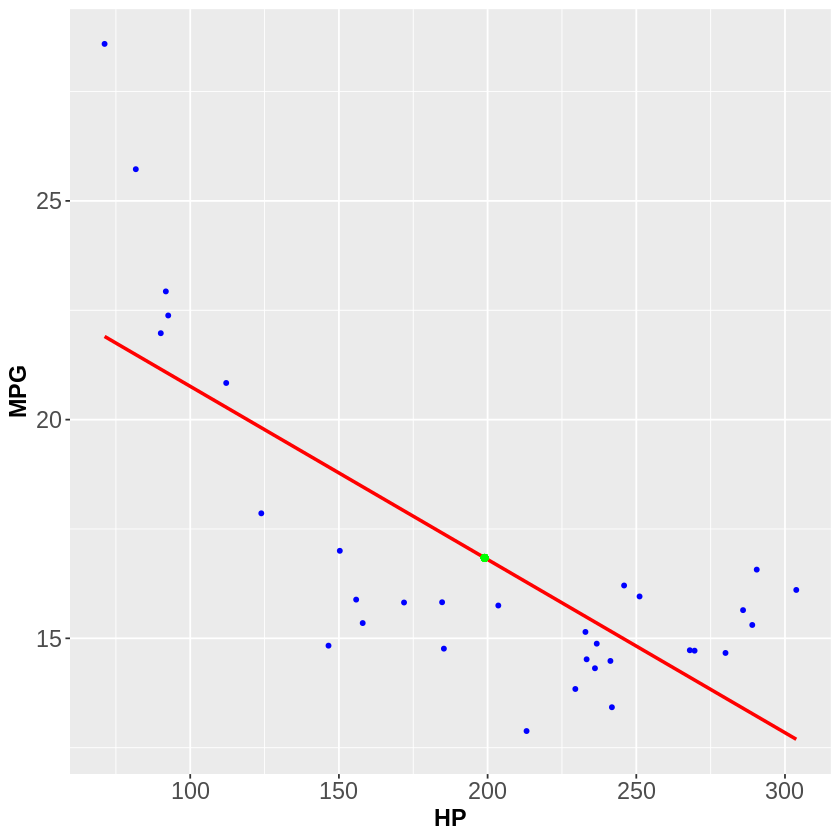

In [14]:
ggplot(data = carDataSample, aes(x = hp, y = mpg)) +
   geom_point(size = 1, color = 'blue') +
   geom_smooth(method = lm, formula = y ~ x, color = 'red', se = FALSE) +
   geom_point(aes(x = mean(hp), y = mean(mpg)), size = 1.5, color = 'green') +
   #geom_text(aes(x = mean(hp), y = mean(mpg)), label = 'mean sample', hjust = 0, vjust = -0.5, size = 6, color = 'green') +
   labs(x = 'HP', y = 'MPG') +
   #ggtitle("Sample regression line") +
   theme(axis.text = element_text(size = 12),
   axis.text.x = element_text(size = 14),
   axis.text.y = element_text(size = 14),
   axis.title = element_text(size = 14, face = "bold"))

In [15]:
summary(model2)


Call:
lm(formula = mpg ~ hp, data = carDataSample)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0872 -1.7742 -0.4116  1.2494  6.6885 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 24.719940   1.320854  18.715  < 2e-16 ***
hp          -0.039592   0.006268  -6.317 5.77e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.459 on 30 degrees of freedom
Multiple R-squared:  0.5708,	Adjusted R-squared:  0.5565 
F-statistic:  39.9 on 1 and 30 DF,  p-value: 5.772e-07


Again we see that:

- (Intercept) which corresponds to the intercept of the line where it cuts the Y-axis is 24.719940 approximately.
- hp_population with value -0.039592, meaning the slope of the straight line or how inclined is the straight line.
`(Our straight line is negatively sloped in such a away that as our hp increases the mpg decreases and vice versa.)`

**Regenerating the samples and conducting the test one more time. We get:**



Warning message in geom_point(aes(x = mean(hp), y = mean(mpg)), size = 1.5, color = "green"):
“All aesthetics have length 1, but the data has 32 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”



Call:
lm(formula = mpg ~ hp, data = carDataSample)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.5675 -3.4114 -0.7373  3.3697  9.4412 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30.244655   1.728619  17.496  < 2e-16 ***
hp          -0.057305   0.008585  -6.675 2.15e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.536 on 30 degrees of freedom
Multiple R-squared:  0.5976,	Adjusted R-squared:  0.5842 
F-statistic: 44.55 on 1 and 30 DF,  p-value: 2.152e-07


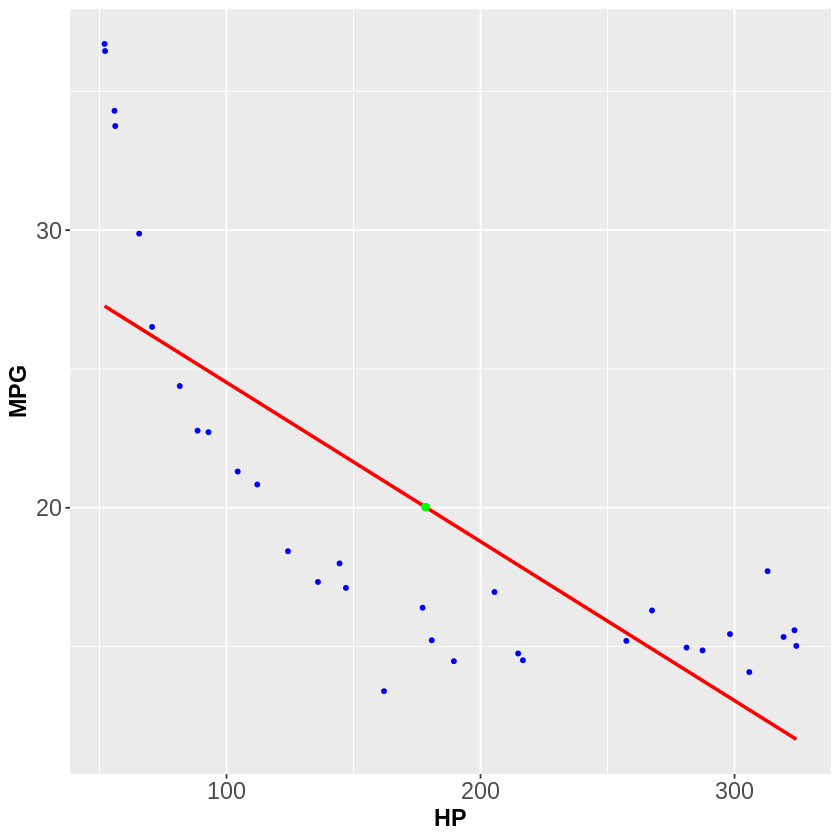

In [16]:
nsamples = 32
carDataSample = carDataPopNoisy[sample(nrow(carDataPopNoisy), nsamples), ]
colnames(carDataSample) = c('hp', 'mpg')

model2 = lm(data = carDataSample, mpg ~ hp)

ggplot(data = carDataSample, aes(x = hp, y = mpg)) +
   geom_point(size = 1, color = 'blue') +
   geom_smooth(method = lm, formula = y ~ x, color = 'red', se = FALSE) +
   geom_point(aes(x = mean(hp), y = mean(mpg)), size = 1.5, color = 'green') +
   #geom_text(aes(x = mean(hp), y = mean(mpg)), label = 'mean sample', hjust = 0, vjust = -0.5, size = 6, color = 'green') +
   labs(x = 'HP', y = 'MPG') +
   #ggtitle("Sample regression line") +
   theme(axis.text = element_text(size = 12),
   axis.text.x = element_text(size = 14),
   axis.text.y = element_text(size = 14),
   axis.title = element_text(size = 14, face = "bold"))

summary(model2)

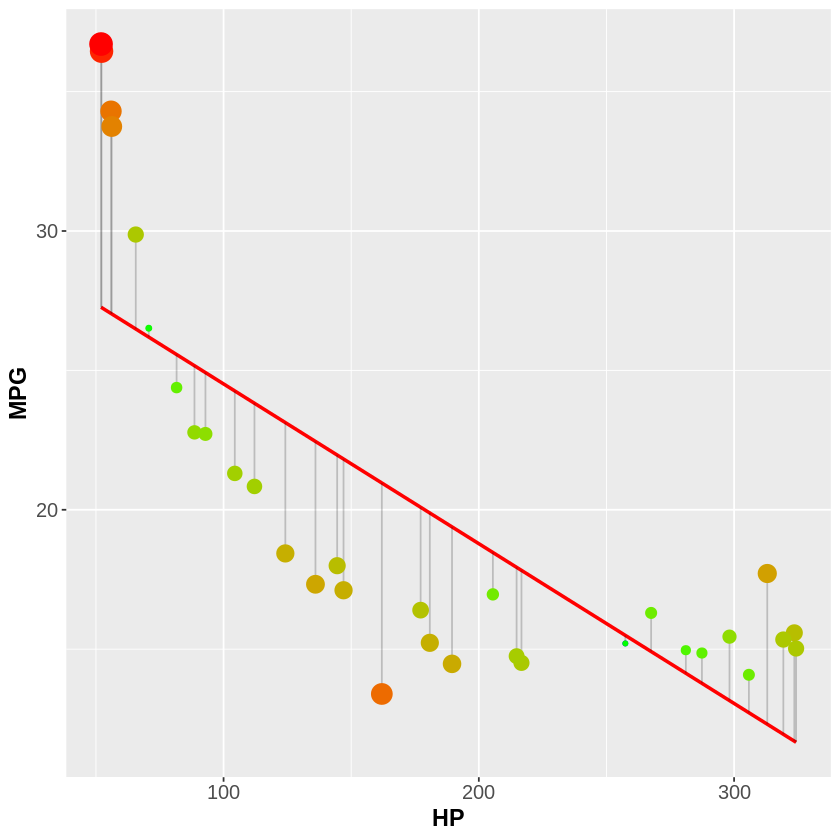

In [22]:
# Plotting actual and predicted response values clearly
# showing the residuals
carDataSample$mpg_predicted = predict(model2)
carDataSample$residuals = residuals(model2)

ggplot(data = carDataSample, aes(x = hp, y = mpg)) +
   geom_point(size = 1, color = 'blue') +
   geom_smooth(method = lm, formula = y ~ x, se = FALSE, color = 'red') +
   geom_segment(aes(xend = hp, yend = mpg_predicted), alpha = 0.2) +
   geom_point(aes(color = abs(residuals), size = abs(residuals))) +
   scale_color_continuous(low = "green", high = "red") +
   guides(color = FALSE, size = FALSE) +
   labs(x = 'HP', y = 'MPG') +
   #ggtitle("Sample regression line") +
   theme(axis.text = element_text(size = 12),
   axis.text.x = element_text(size = 12),
   axis.text.y = element_text(size = 12),
   axis.title = element_text(size = 14, face = "bold"))